In [6]:
import numpy as np
import polars as pl
import bambi as bm
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pymc as pm
import arviz as az

### The SML-hat

[]

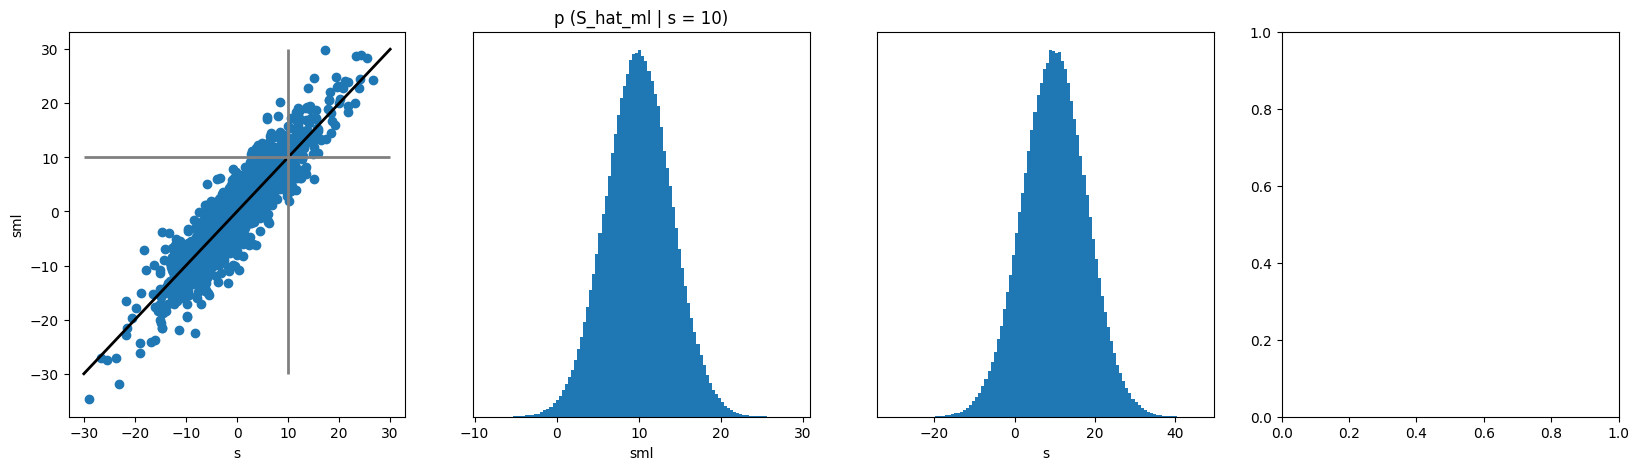

In [64]:
# # define true parameters
# mu = 0
# sigma_s = 8
# sigma = 4

# n_samples = 1_000_000
# s = np.random.normal(mu, sigma_s, n_samples)
# sml = np.random.normal(s, sigma)

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].scatter(s[:1000], sml[:1000]);
ax[0].plot([-30, 30], [-30, 30], color="black", lw=2);
ax[0].vlines(10,-30, 30, color="gray", lw=2);
ax[0].hlines(10,-30, 30, color="gray", lw=2);
ax[0].set_xlabel("s")
ax[0].set_ylabel("sml")

ax[1].hist(np.random.normal(10, sigma, n_samples), bins=100);
ax[1].set_xlabel("sml")
ax[1].set_yticks([])
ax[1].set_title("p (S_hat_ml | s = 10)")

# plot p(s | sml = 10)
ax[2].hist(np.random.normal(10, sigma_s, n_samples), bins=100);
ax[2].set_xlabel("s")
ax[2].set_yticks([])





In [28]:
with pm.Model() as toy_model:
    # prior definition
    s = pm.Normal('x', mu=0, sigma=8)
    # likelihood definition
    likelihood = pm.Normal('x_obs', mu=s, sigma=4, observed=x_obs)
    
    trace = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


In [34]:
likelihood

x_obs ~ Normal(x, 4)

In [30]:
# plot s vs maximum likelihood estimate of x
plt.figure(figsize=(10, 6))
plt.plot(s, trace['x'].mean(), 'o', alpha=0.1)
plt.xlabel('s')
plt.ylabel('x')
plt.show()


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_32272/1639648635.py", line 3, in <module>
    plt.plot(s, trace['x'].mean(), 'o', alpha=0.1)
  File "/usr/local/lib/python3.10/dist-packages/arviz/data/inference_data.py", line 259, in __getitem__
KeyError: 'x'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1428, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1319, in structured_traceback
    return VerboseTB.structured_traceback

<Figure size 1000x600 with 0 Axes>

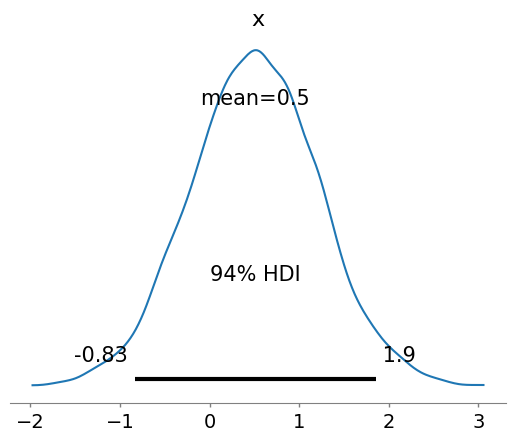

In [12]:
fig, ax = plt.subplots()
az.plot_posterior(data=trace, ax=ax);

In [20]:
# get posterior distribution and response distribution
posterior = trace.posterior

In [21]:
# Postreior Mean Estimation
posterior_mean = posterior.mean(dim=["chain", "draw"])
prior_mean = prior.mean(dim=["chain", "draw"])


TypeError: _tensor_py_operators.mean() got an unexpected keyword argument 'dim'

### Beta-binomial model

In [101]:
from scipy import stats

Y = stats.bernoulli(0.7).rvs(20)

with pm.Model() as model:
    # prior
    θ = pm.Beta('θ', alpha=1, beta=1)
    # specify likelihood distribution and condition on observed data
    y_obs = pm.Bernoulli('y_obs', p=θ, observed=Y)
    
    idata = pm.sample(1000, return_inferencedata=True)
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


In [99]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

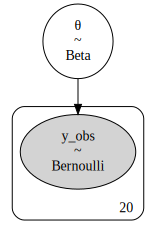

In [78]:
pm.model_to_graphviz(model)

In [105]:
with model:
    # idata = pm.sample()
    idata.extend(pm.sample_prior_predictive())
    idata.extend(pm.sample_posterior_predictive(idata))

Sampling: [y_obs, θ]


Sampling: [y_obs]


In [129]:
az.summary(idata, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
θ,0.63,0.1,0.45,0.82,0.0,0.0,1644.61,2945.35,1.0


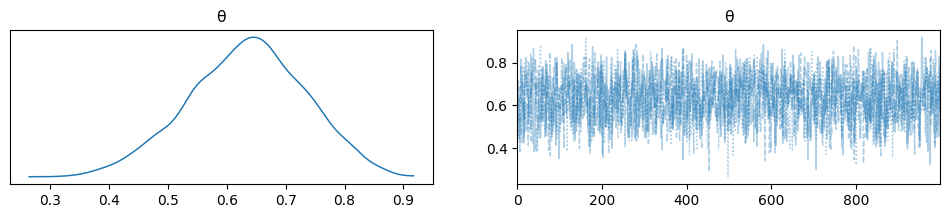

In [128]:
az.plot_trace(idata, combined=True);

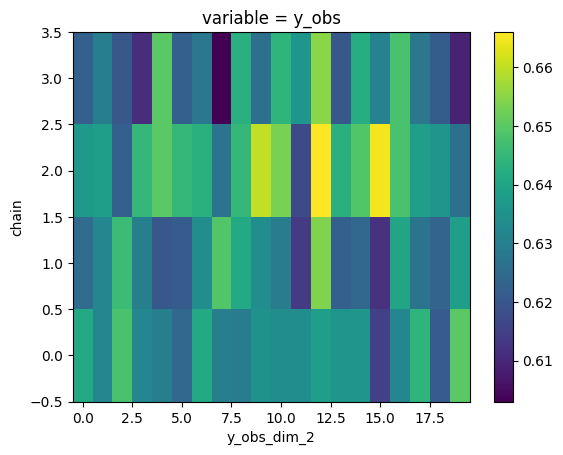

In [116]:
idata.posterior_predictive.sel(draw=slice(0, 1000)).to_array().mean(dim="draw").plot()

array([[<Axes: title={'center': 'y_obs\n0'}>,
        <Axes: title={'center': 'y_obs\n1'}>,
        <Axes: title={'center': 'y_obs\n2'}>,
        <Axes: title={'center': 'y_obs\n3'}>],
       [<Axes: title={'center': 'y_obs\n4'}>,
        <Axes: title={'center': 'y_obs\n5'}>,
        <Axes: title={'center': 'y_obs\n6'}>,
        <Axes: title={'center': 'y_obs\n7'}>],
       [<Axes: title={'center': 'y_obs\n8'}>,
        <Axes: title={'center': 'y_obs\n9'}>,
        <Axes: title={'center': 'y_obs\n10'}>,
        <Axes: title={'center': 'y_obs\n11'}>],
       [<Axes: title={'center': 'y_obs\n12'}>,
        <Axes: title={'center': 'y_obs\n13'}>,
        <Axes: title={'center': 'y_obs\n14'}>,
        <Axes: title={'center': 'y_obs\n15'}>],
       [<Axes: title={'center': 'y_obs\n16'}>,
        <Axes: title={'center': 'y_obs\n17'}>,
        <Axes: title={'center': 'y_obs\n18'}>,
        <Axes: title={'center': 'y_obs\n19'}>]], dtype=object)

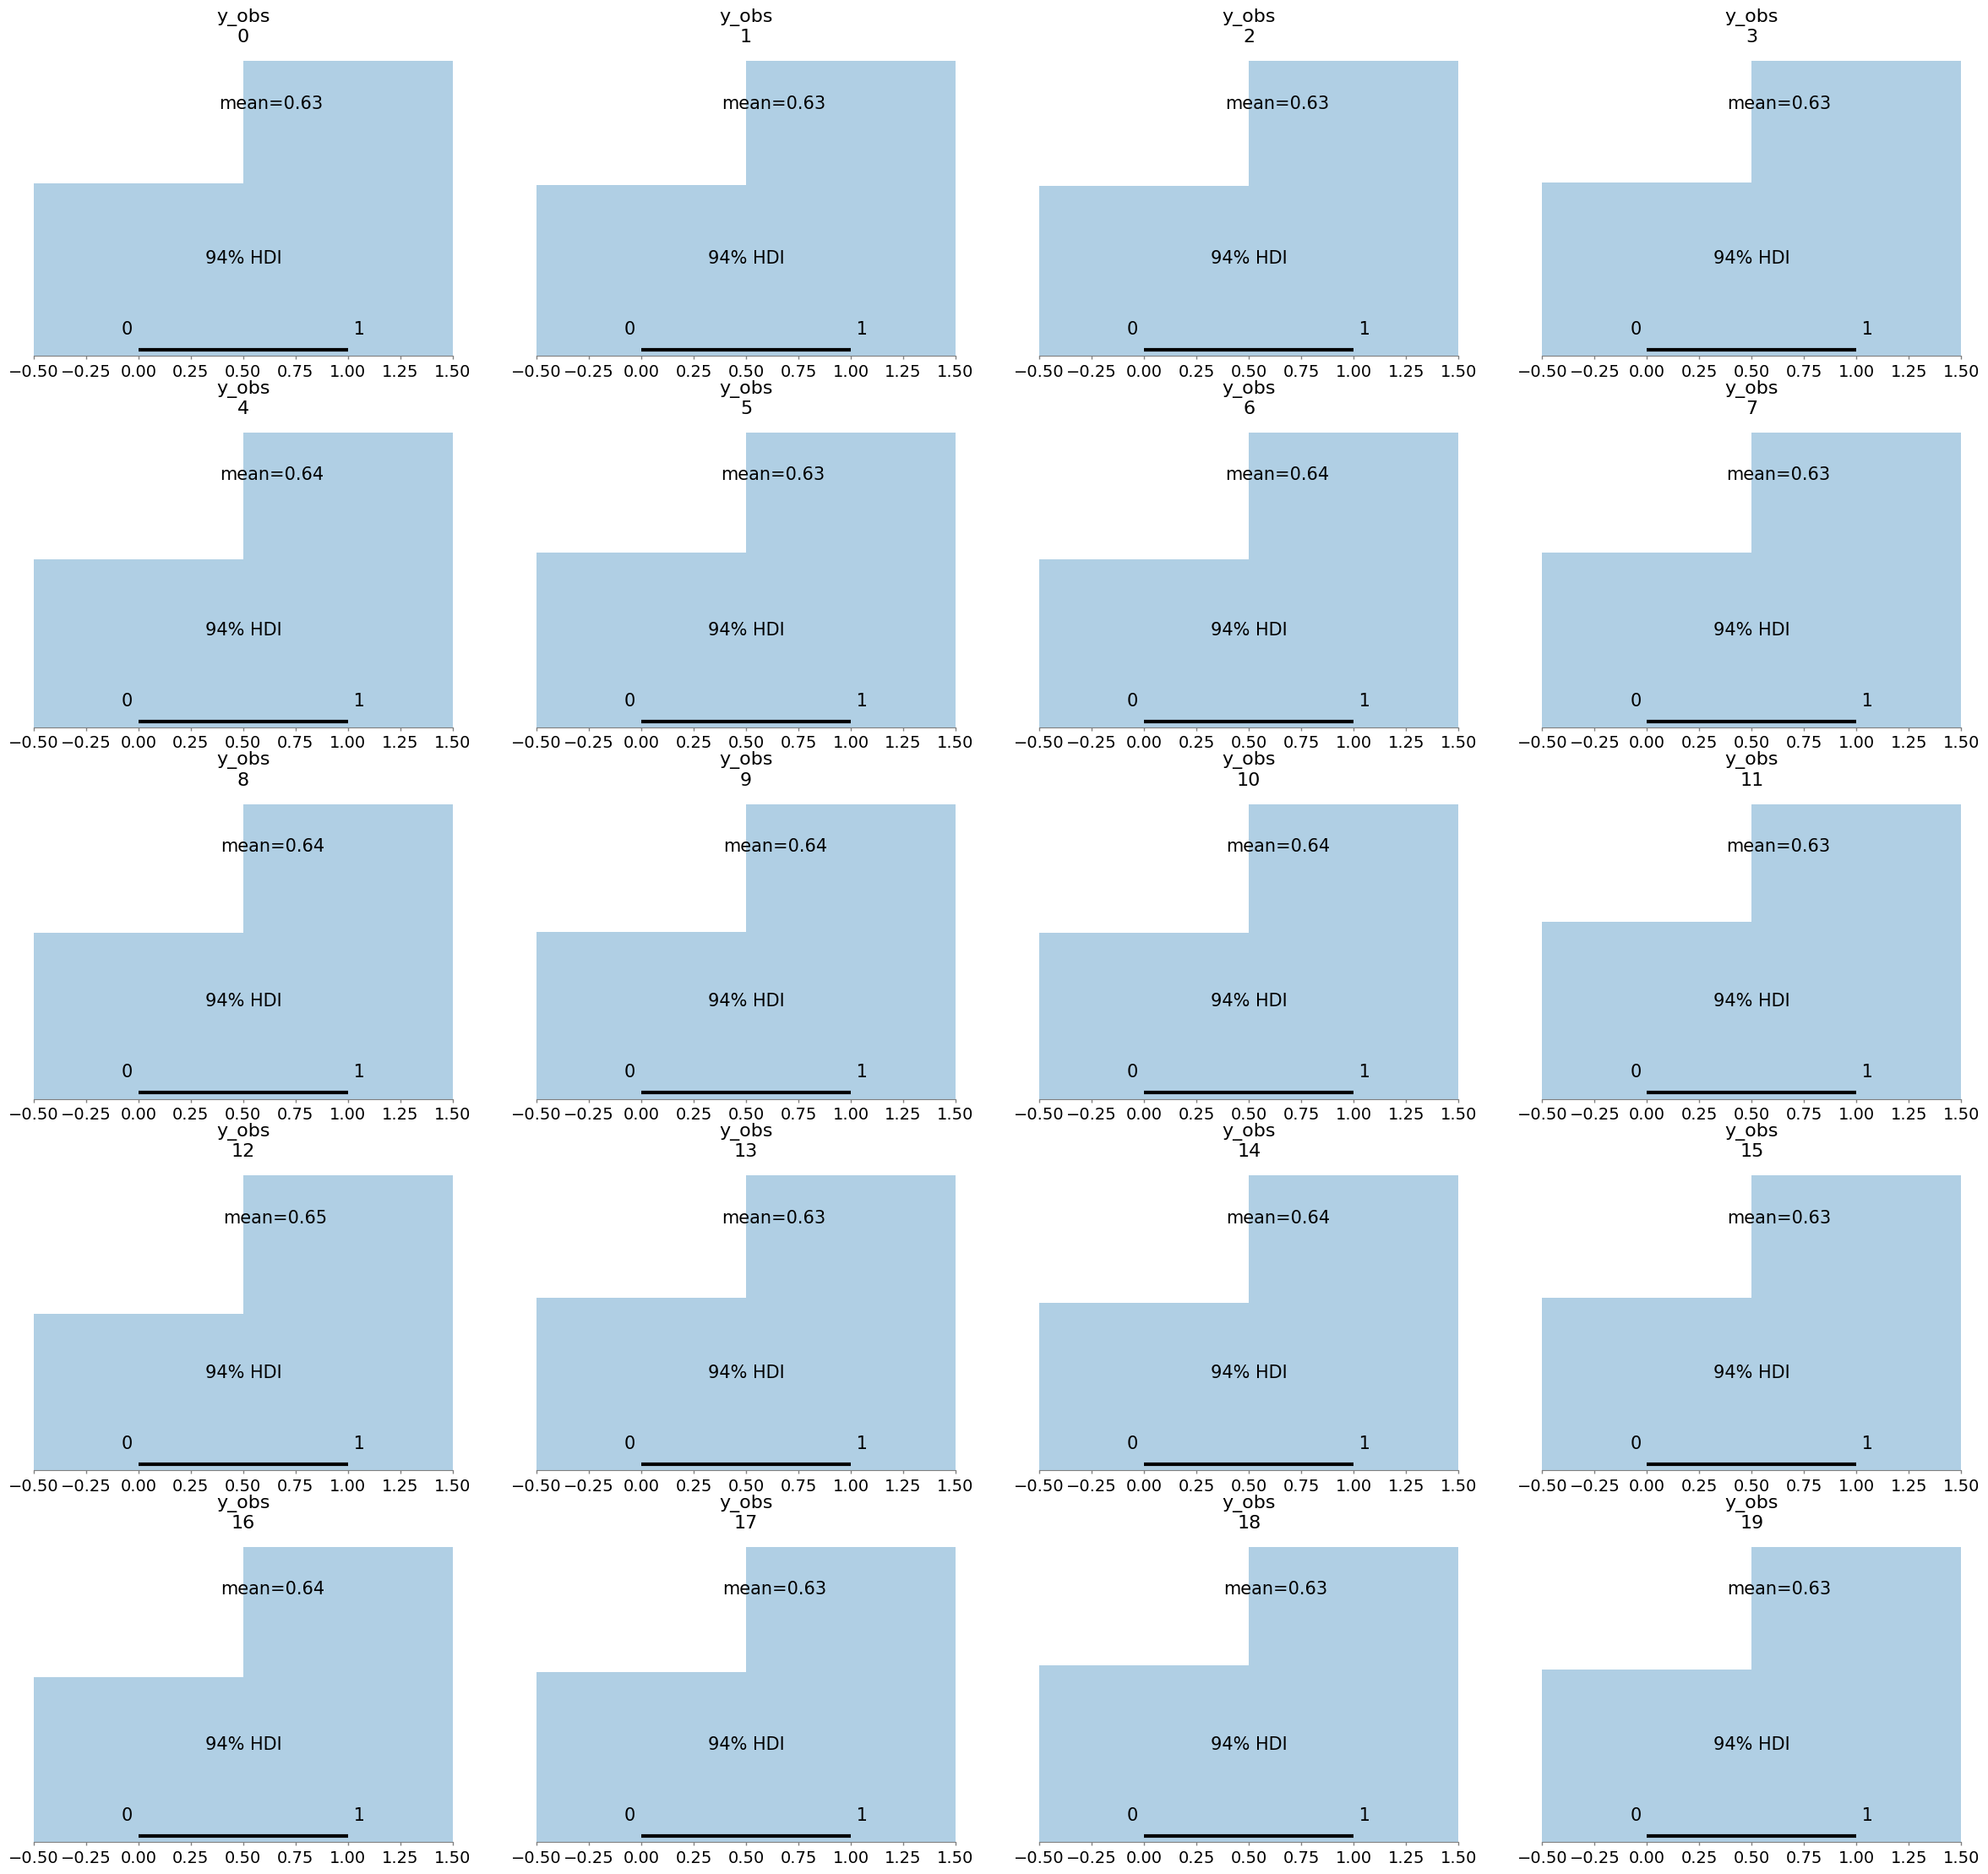

In [111]:
az.plot_posterior()

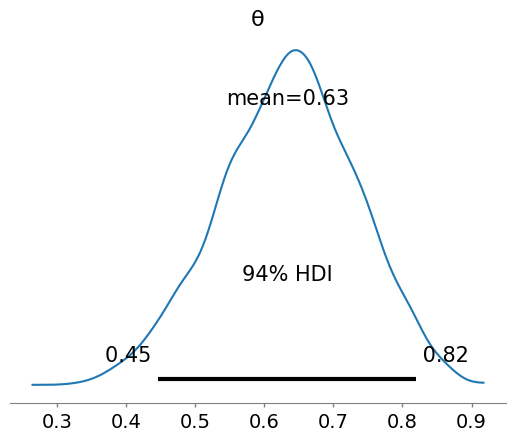

In [108]:
az.plot_posterior(idata, var_names=["θ"], round_to=2);

In [103]:
idata

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> prior
	> prior_predictive
	> observed_data

In [84]:
pm.sample_prior_predictive(1000, model).keys()

Sampling: [y_obs, θ]


KeysView(Inference data with groups:
	> prior
	> prior_predictive
	> observed_data)

In [92]:
# pm.sample_prior_predictive(samples=1000, model=model)
pm.sample_posterior_predictive(idata, 1000)["y_obs"]

AttributeError: 'int' object has no attribute 'potentials'

In [97]:
with model:
    pred_dist = (
    pm.sample_prior_predictive(samples=1000, model=model),
    pm.sample_posterior_predictive(idata, 1000)
    )

Sampling: [y_obs, θ]


AttributeError: 'int' object has no attribute 'potentials'